In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!rm -rf /content/sample_data

Mounted at /content/gdrive


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!pip install ultralytics

In [3]:
!nvidia-smi

Sun Aug 11 13:14:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Now Start

In [6]:
!mkdir /content/images
!unzip -q /content/images.zip -d /content/images
!rm -r /content/images.zip

mkdir: cannot create directory ‘/content/images’: File exists


## Custom Training

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/images/custom_data.yaml epochs=100 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 254MB/s]
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/images/custom_data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

In [10]:
!ls /content/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1723382166.3ffec5af63ce.1328.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1800.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1801.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1802.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


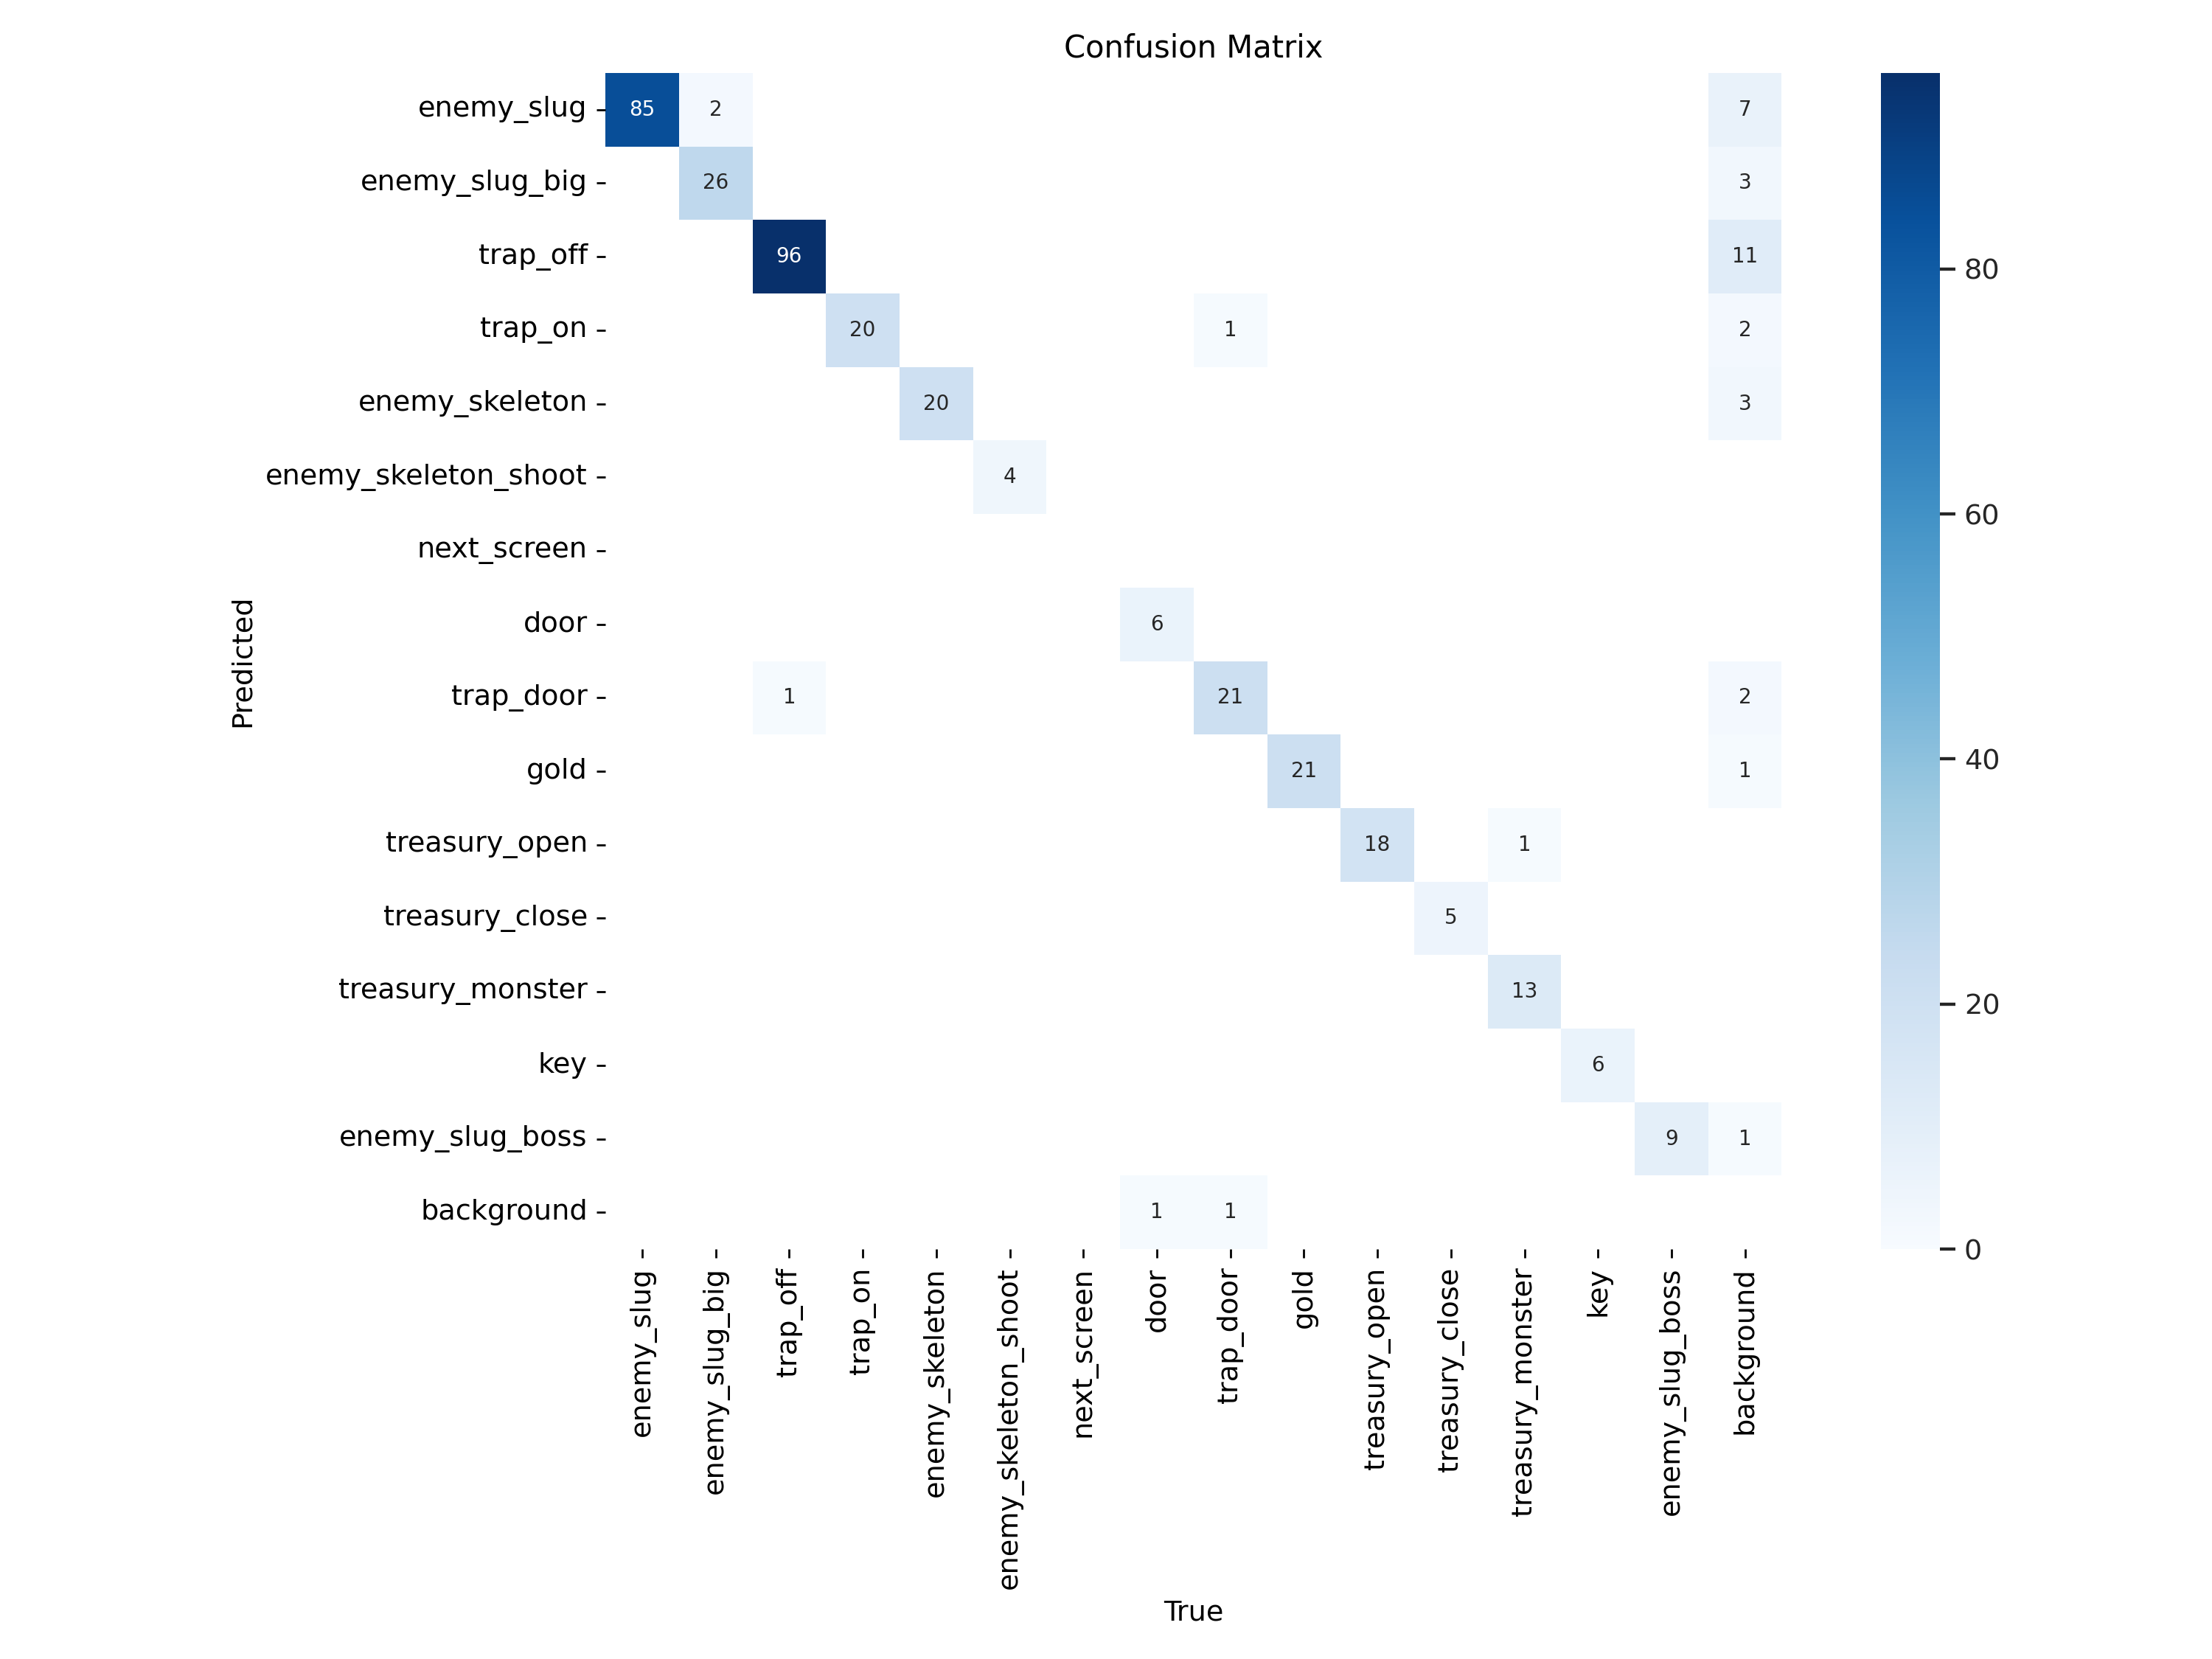

In [11]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

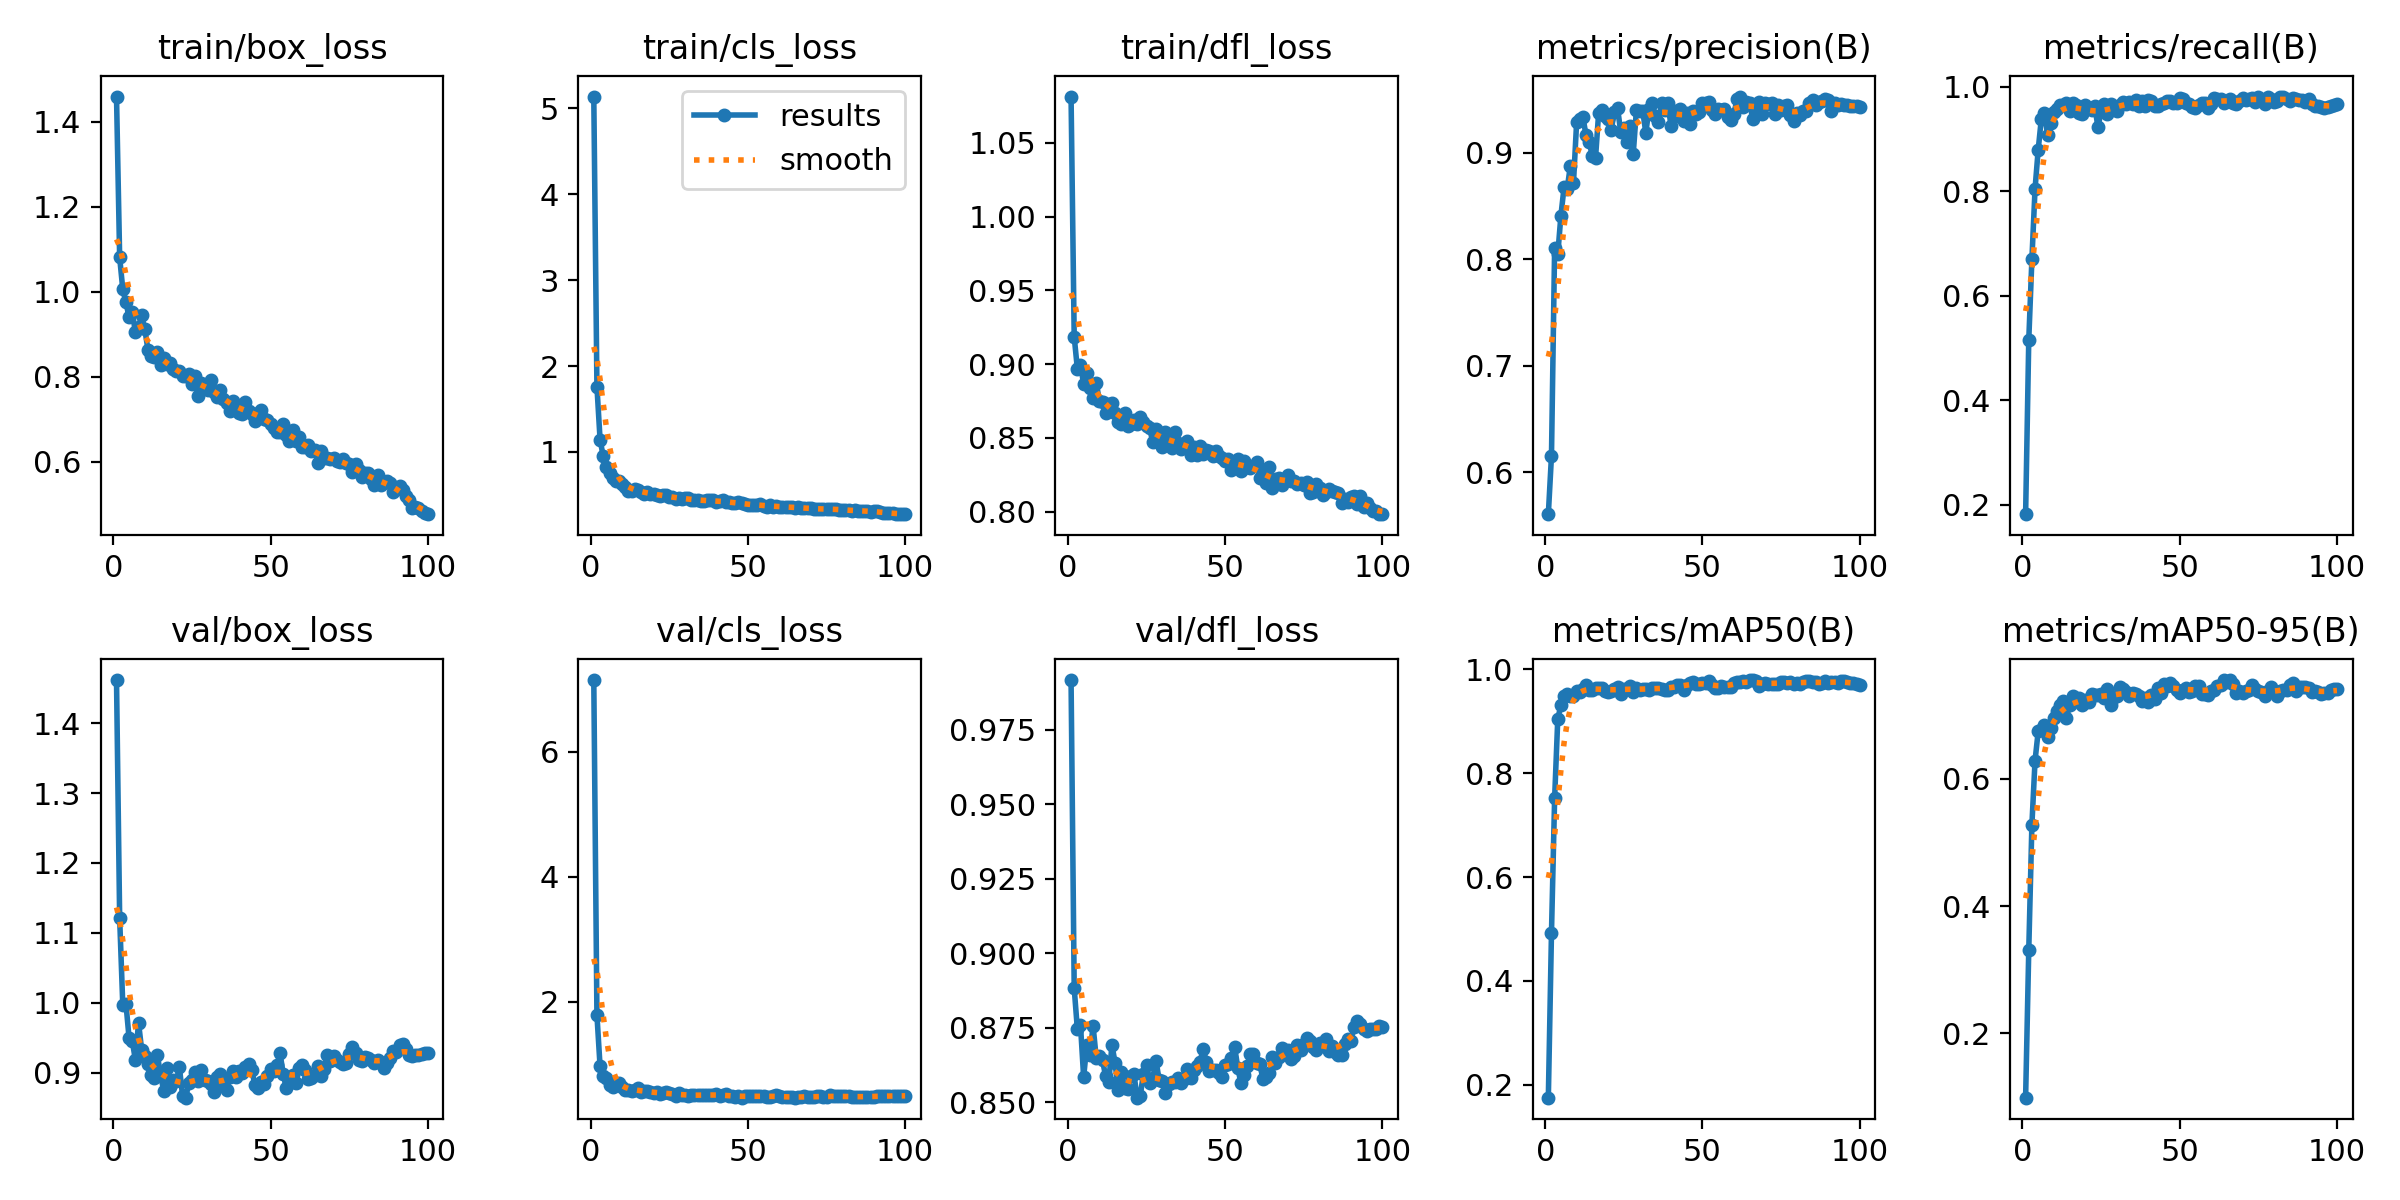

In [12]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

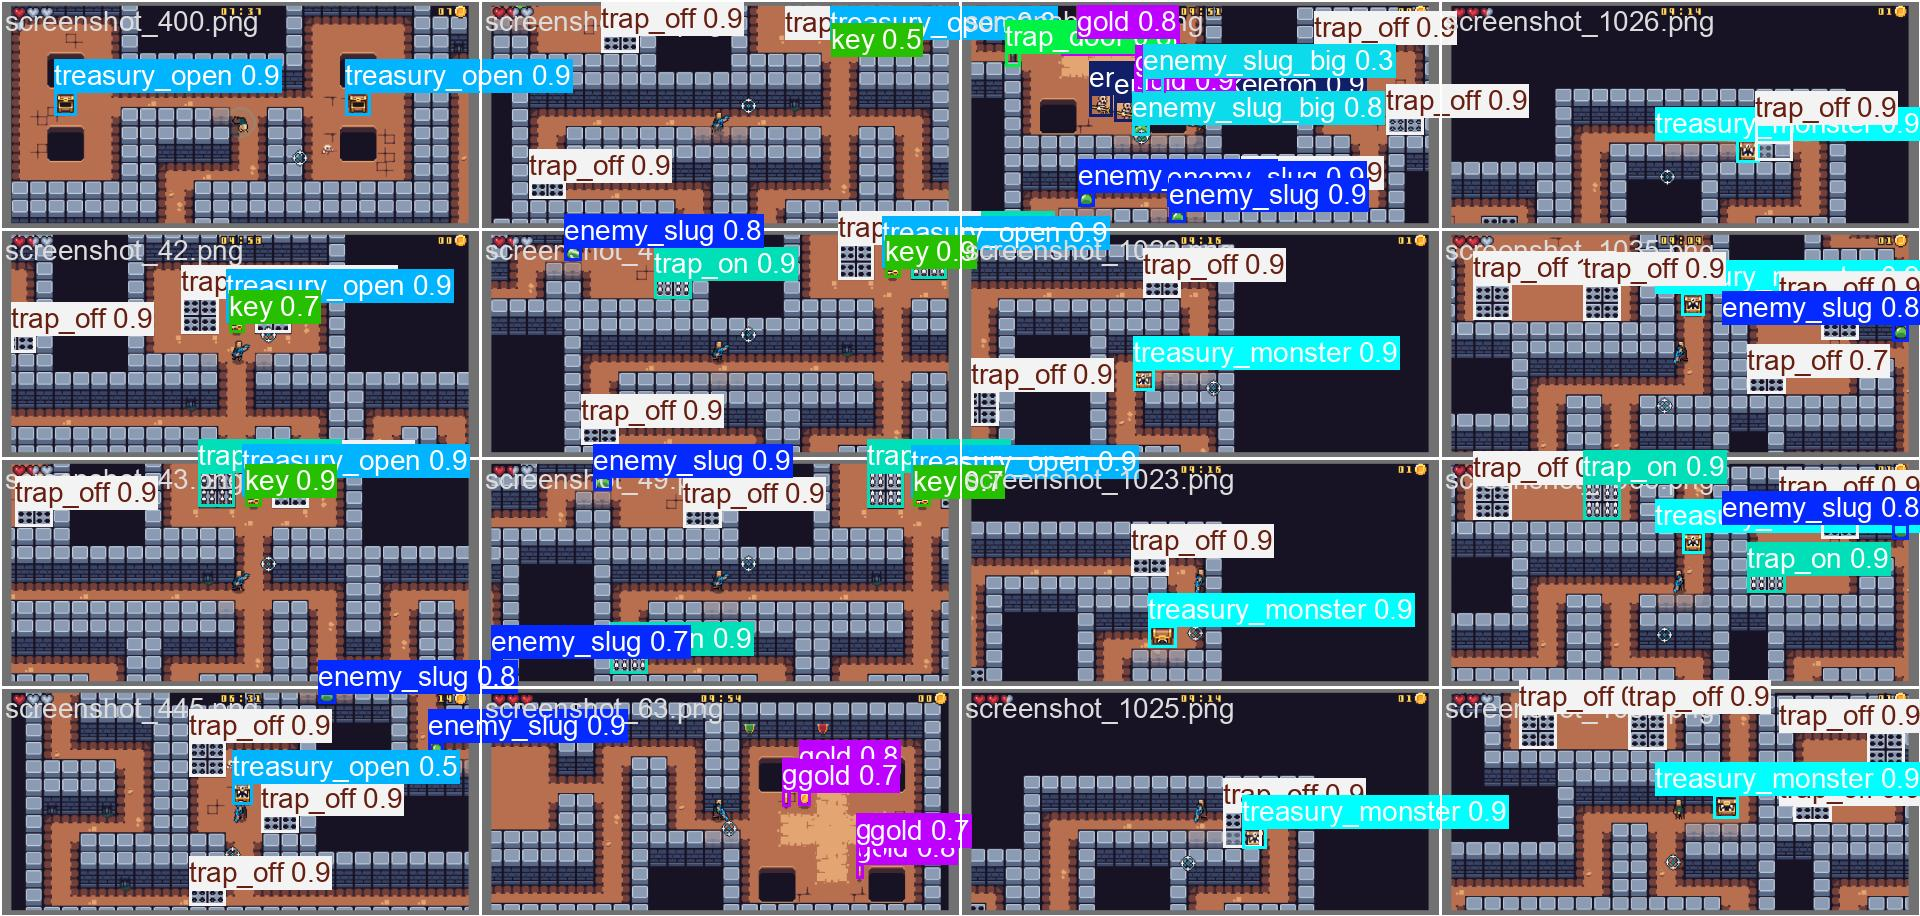

In [13]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/images/custom_data.yaml

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/images/val/labels.cache... 79 images, 0 backgrounds, 0 corrupt: 100% 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.10s/it]
                   all         79        357      0.931      0.977      0.979      0.757
            enemy_slug         40         85      0.937          1      0.985      0.688
        enemy_slug_big         13         28      0.912      0.929      0.958      0.751
              trap_off         55         97      0.906       0.99      0.988      0.885
               trap_on         14         20      0.862          1      0.975      0.879
        enemy_skeleton         13         20      0.907          1      0.958      0.647
  enemy_skeleton_shoot          4          4          1  

In [ ]:
from google.colab import files
!rm -r /content/gdrive/MyDrive/YOLO/runs
!cp -r /content/runs /content/gdrive/MyDrive/YOLO/
!zip -r /content/gdrive/MyDrive/YOLO/runs.zip /content/runs
files.download('/content/gdrive/MyDrive/YOLO/runs.zip')

## Inference with Custom Model

In [17]:
!mkdir /content/test
!unzip -q /content/test.zip -d /content/test
!rm -r /content/test.zip

In [19]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/test save=True

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

image 1/6 /content/test/screenshot_539.png: 320x640 1 enemy_slug, 2 trap_offs, 1 door, 75.2ms
image 2/6 /content/test/screenshot_567.png: 320x640 3 enemy_slug_bigs, 3 trap_offs, 1 enemy_skeleton, 1 enemy_skeleton_shoot, 1 trap_door, 10.5ms
image 3/6 /content/test/screenshot_649.png: 320x640 1 enemy_slug_big, 2 trap_offs, 2 trap_ons, 5 enemy_skeletons, 4 enemy_skeleton_shoots, 1 trap_door, 5 golds, 10.6ms
image 4/6 /content/test/screenshot_657.png: 320x640 1 trap_off, 2 trap_ons, 5 enemy_skeletons, 1 trap_door, 2 golds, 10.4ms
image 5/6 /content/test/screenshot_927.png: 320x640 3 enemy_slug_bigs, 1 trap_door, 1 enemy_slug_boss, 10.4ms
image 6/6 /content/test/screenshot_937.png: 320x640 1 enemy_slug, 1 enemy_slug_boss, 10.4ms
Speed: 1.7ms preprocess, 21.3ms inference, 104.3ms postprocess per image at shape (1, 3, 320, 6

**NOTE:** Let's take a look at few results.

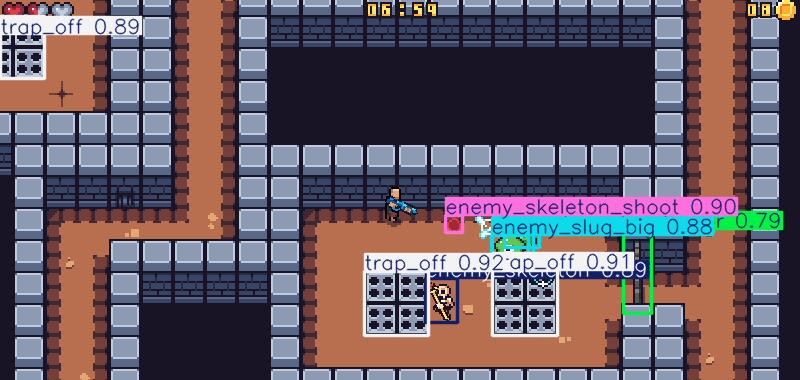

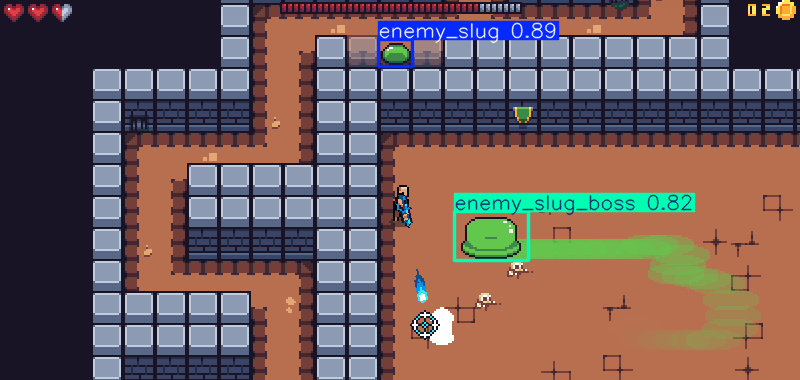

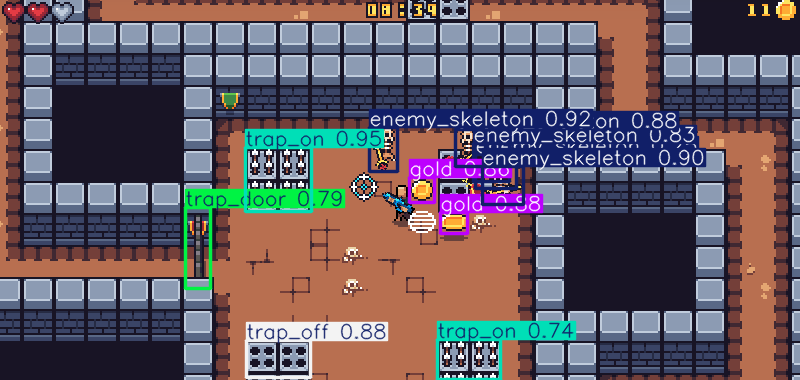

In [22]:
import glob,os
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.png')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")